Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions 
Note 1.Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
data = pd.read_json(url)
data

,pokemon
0,"{'id': 1, 'num': '001', 'name': 'Bulbasaur', '..."
1,"{'id': 2, 'num': '002', 'name': 'Ivysaur', 'im..."
2,"{'id': 3, 'num': '003', 'name': 'Venusaur', 'i..."
3,"{'id': 4, 'num': '004', 'name': 'Charmander', ..."
4,"{'id': 5, 'num': '005', 'name': 'Charmeleon', ..."
...,...
146,"{'id': 147, 'num': '147', 'name': 'Dratini', '..."
147,"{'id': 148, 'num': '148', 'name': 'Dragonair',..."
148,"{'id': 149, 'num': '149', 'name': 'Dragonite',..."
149,"{'id': 150, 'num': '150', 'name': 'Mewtwo', 'i..."


In [3]:
from pandas.io.json import json_normalize
pokem = json_normalize(data['pokemon'])
pokem.head(2)

C:\Users\Rahil\AppData\Local\Temp\ipykernel_24396\2902523899.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  pokem = json_normalize(data['pokemon'])


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"


In [4]:
pokem.type.value_counts()

[Water]               18
[Normal]              16
[Fire]                10
[Poison]              10
[Grass, Poison]        9
[Normal, Flying]       8
[Electric]             8
[Psychic]              8
[Fighting]             7
[Ground]               6
[Bug, Poison]          5
[Rock, Water]          4
[Rock, Ground]         4
[Ghost, Poison]        3
[Water, Psychic]       3
[Water, Ice]           3
[Bug]                  3
[Water, Poison]        2
[Bug, Grass]           2
[Poison, Flying]       2
[Bug, Flying]          2
[Poison, Ground]       2
[Grass, Psychic]       2
[Ground, Rock]         2
[Fire, Flying]         2
[Dragon]               2
[Water, Fighting]      1
[Ice, Flying]          1
[Electric, Flying]     1
[Grass]                1
[Rock, Flying]         1
[Water, Flying]        1
[Ice, Psychic]         1
[Dragon, Flying]       1
Name: type, dtype: int64

In [5]:
pokem['spawn_chance'].value_counts()

0.0000    6
0.0120    5
0.0220    4
0.0170    4
0.0200    4
         ..
0.0097    1
0.0640    1
6.5200    1
0.3900    1
0.0011    1
Name: spawn_chance, Length: 104, dtype: int64

In [6]:
null_multipliers = pokem[pokem['multipliers'].isnull()]
non_null_multipliers = pokem[~pokem['multipliers'].isnull()]

In [7]:
pokem["next_evolution"]

0      [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...
1                   [{'num': '003', 'name': 'Venusaur'}]
2                                                    NaN
3      [{'num': '005', 'name': 'Charmeleon'}, {'num':...
4                  [{'num': '006', 'name': 'Charizard'}]
                             ...                        
146    [{'num': '148', 'name': 'Dragonair'}, {'num': ...
147                [{'num': '149', 'name': 'Dragonite'}]
148                                                  NaN
149                                                  NaN
150                                                  NaN
Name: next_evolution, Length: 151, dtype: object

In [8]:
null_multipliers.head(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
8,9,009,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,00:06,None,"[Electric, Grass]",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."


In [9]:
non_null_multipliers.head(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN


In [10]:
type(pokem['next_evolution'])

pandas.core.series.Series

In [11]:
pokem['next_evolution'][0]
new_list = [d.get('num') for d in pokem['next_evolution'][0]]
print(new_list)

['002', '003']


In [91]:
pokem['next_evolution'][0]
new_list = [d.get('num') for d in pokem['next_evolution'][0]]
print(len(new_list))

2


In [116]:
pokem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(13)

In [16]:
pokem['next_evolution'][0]

[{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]

In [20]:
x=pokem['next_evolution'][0]

In [21]:
len(x)

2

In [119]:
type(pokem['next_evolution'][0])

list

In [115]:
pokem['next_evolution']
df1 = pd.DataFrame(pokem['next_evolution'])
simple_list = [d['name'] for d in pokem['next_evolution'] if isinstance(d['name'], str)]
print(simple_list)


TypeError: list indices must be integers or slices, not str

In [23]:
import pandas as pd

my_list = [{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}, {'num': '004', 'name': 'Dog'}, {'num': '005', 'name': 'Charmeleon'}, {'num': '006', 'name': 'Charizard'}]
df = pd.DataFrame(my_list)
simple_list = [d['name'] for d in my_list if isinstance(d['name'], str)]
print(simple_list)

['Ivysaur', 'Venusaur', 'Dog', 'Charmeleon', 'Charizard']


In [ ]:
spawn_rate_threshold = 0.05
pokemons_low_spawn_rate = pokem[pokem['spawn_chance'] < spawn_rate_threshold]
pokemons_low_spawn_rate

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


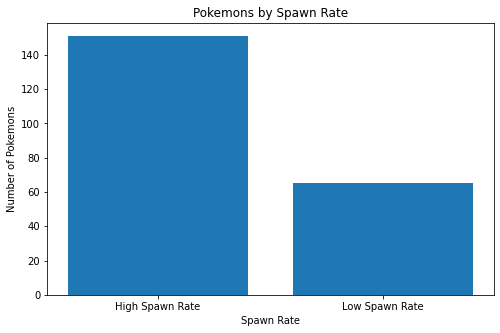

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['High Spawn Rate', 'Low Spawn Rate'], [len(data), len(pokemons_low_spawn_rate)])
plt.xlabel('Spawn Rate')
plt.ylabel('Number of Pokemons')
plt.title('Pokemons by Spawn Rate')
plt.show()

In [ ]:
pokem['weaknesses'].count

<bound method Series.count of 0      ['Fire', 'Ice', 'Flying', 'Psychic']
1      ['Fire', 'Ice', 'Flying', 'Psychic']
2      ['Fire', 'Ice', 'Flying', 'Psychic']
3               ['Water', 'Ground', 'Rock']
4               ['Water', 'Ground', 'Rock']
                       ...                 
146              ['Ice', 'Dragon', 'Fairy']
147              ['Ice', 'Dragon', 'Fairy']
148      ['Ice', 'Rock', 'Dragon', 'Fairy']
149                ['Bug', 'Ghost', 'Dark']
150                ['Bug', 'Ghost', 'Dark']
Name: weaknesses, Length: 151, dtype: object>

In [ ]:
[pokem['name'] for x in pokem['weaknesses'] if len(x)<4]

[(0       Bulbasaur
  1         Ivysaur
  2        Venusaur
  3      Charmander
  4      Charmeleon
            ...    
  146       Dratini
  147     Dragonair
  148     Dragonite
  149        Mewtwo
  150           Mew
  Name: name, Length: 151, dtype: object,
  3),
 (0       Bulbasaur
  1         Ivysaur
  2        Venusaur
  3      Charmander
  4      Charmeleon
            ...    
  146       Dratini
  147     Dragonair
  148     Dragonite
  149        Mewtwo
  150           Mew
  Name: name, Length: 151, dtype: object,
  3),
 (0       Bulbasaur
  1         Ivysaur
  2        Venusaur
  3      Charmander
  4      Charmeleon
            ...    
  146       Dratini
  147     Dragonair
  148     Dragonite
  149        Mewtwo
  150           Mew
  Name: name, Length: 151, dtype: object,
  3),
 (0       Bulbasaur
  1         Ivysaur
  2        Venusaur
  3      Charmander
  4      Charmeleon
            ...    
  146       Dratini
  147     Dragonair
  148     Dragonite
  149        Mew

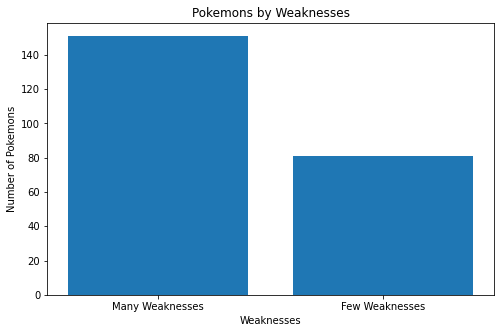

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['Many Weaknesses', 'Few Weaknesses'], [len(data), len(null_multipliers)])
plt.xlabel('Weaknesses')
plt.ylabel('Number of Pokemons')
plt.title('Pokemons by Weaknesses')
plt.show()